# Pi finder

## Relevant formulas

- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

## Image to visualize the concept

![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

In [65]:
import random
import matplotlib.pyplot as plt
import pandas as pd

n_points = int(1e+3)

In [12]:
points = []
hits = 0
for _ in range(n_points):
    x, y = random.random(), random.random()
    if x*x + y*y <1.0:
        hits += 1
        points.append((x, y, "red"))
    else:
        points.append((x, y, "blue"))



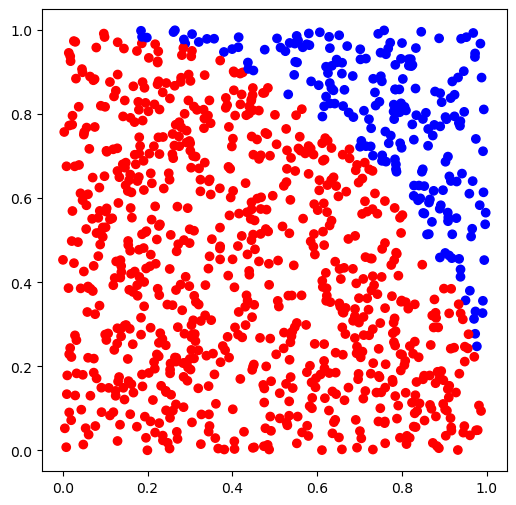

In [16]:
x, y, colors = zip(*points)
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax.scatter(x, y, c=colors)

In [20]:
fraction = hits / n_points
fraction * 4

3.16

In [ ]:
results = []
for n_points in range(1, 10_000, 100):
    print(f"Calculating with {n_points} points.")
    points = []
    hits = 0
    for _ in range(n_points):
        x, y = random.random(), random.random()
        if x*x + y*y <1.0:
            hits += 1
            points.append((x, y, "red"))
        else:
            points.append((x, y, "blue"))
    pi_approx = 4 * (hits / n_points)
    results.append((n_points, pi_approx))
print("Done")

In [ ]:
pts, pi_approx = zip(*results)
df = pd.DataFrame({"pts": pts,
                   "pi_approx": pi_approx})
df["rolling_avg"] = df["pi_approx"].rolling(10).var()

In [ ]:
fig, axs = plt.subplots(2, ncols = 1)
fig.set_size_inches(20, 4)
axs[0].plot(df["pts"], df["pi_approx"], label="Sampling")
axs[1].plot(df["pts"], np.log10(df["rolling_avg"]), label="Rolling variance")
axs[0].legend()
axs[1].legend()
# fig.legend()

In [45]:
df.iloc[-1000:, 1].mean()

3.14144191664616